In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
pd.options.display.float_format = '{:.4f}'.format
import matplotlib
from tqdm.notebook import tqdm


import sys
# adding notebooks to the system path
sys.path.insert(0, '/home/southark/notebooks')


matplotlib.rcParams['pdf.fonttype'] = 42
%load_ext autoreload
%autoreload 2
%matplotlib inline

from perturbseq import *
import scanpy as sc

In [3]:
EXPERIMENT = '/data/norman/datasets/RA022_Hs27aTFs/cellranger_outputs_additionalseq/cellranger_aggr/'

In [4]:
from glob import glob
import os

#list of sample names
#gather from the workingfolder
COUNT_GLOB = '*outs*'

#perform for each project folder (i.e. if more sequencing was ordered)

unique_outs = sorted(set(map(lambda x: x.split('cellranger_aggr/')[-1].split('/outs')[0], 
                                glob(os.path.join(EXPERIMENT, '**', COUNT_GLOB)))))


In [5]:
unique_outs

['aggr_ALL']

In [6]:
#FILENAME = '/outs/filtered_feature_bc_matrix.h5'
FILENAME = '/outs/count/filtered_feature_bc_matrix.h5' #since working from an aggr

# List of paths to the cellranger output folders
cellranger_output_paths = [EXPERIMENT+d+FILENAME for d in unique_outs]

cellranger_output_paths

['/data/norman/datasets/RA022_Hs27aTFs/cellranger_outputs_additionalseq/cellranger_aggr/aggr_ALL/outs/count/filtered_feature_bc_matrix.h5']

In [7]:
for i, path in enumerate(cellranger_output_paths):
    print(i)

0


In [8]:
# Import the data from each folder and concatenate them into a single AnnData object
adata_list = []
for i, path in enumerate(cellranger_output_paths):
    print(i)
    adata = sc.read_10x_h5(path, gex_only=False)#import full matrix
    adata.var_names_make_unique()
    adata.obs['dataset'] = unique_outs[i]
    #adata.obs['cell_barcode'] = adata.obs.index.str.split('-').str[0]
    #adata.obs = adata.obs.reset_index().set_index('cell_barcode').rename(columns = {'index': 'old_barcode'})
    adata_list.append(adata)

0


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [9]:
adata_list[0].obs

,dataset
AAACCCAAGAAATGGG-1,aggr_ALL
AAACCCAAGGACTGGT-1,aggr_ALL
AAACCCAAGTCCGTCG-1,aggr_ALL
AAACCCACAACTACGT-1,aggr_ALL
AAACCCACACGAAGAC-1,aggr_ALL
...,...
TTTGTTGTCTATACGG-16,aggr_ALL
TTTGTTGTCTCCAAGA-16,aggr_ALL
TTTGTTGTCTCCCTAG-16,aggr_ALL
TTTGTTGTCTCGCTCA-16,aggr_ALL


In [10]:
adata_list[0].var.feature_types.value_counts()

Gene Expression         36601
CRISPR Guide Capture    10979
Name: feature_types, dtype: int64

In [11]:
adata = adata_list[0]#.concatenate(adata_list[1:], join='outer')

In [12]:
adata.obs

,dataset
AAACCCAAGAAATGGG-1,aggr_ALL
AAACCCAAGGACTGGT-1,aggr_ALL
AAACCCAAGTCCGTCG-1,aggr_ALL
AAACCCACAACTACGT-1,aggr_ALL
AAACCCACACGAAGAC-1,aggr_ALL
...,...
TTTGTTGTCTATACGG-16,aggr_ALL
TTTGTTGTCTCCAAGA-16,aggr_ALL
TTTGTTGTCTCCCTAG-16,aggr_ALL
TTTGTTGTCTCGCTCA-16,aggr_ALL


In [17]:
adata.var

,gene_ids,feature_types,genome
MIR1302-2HG,ENSG00000243485,Gene Expression,GRCh38
FAM138A,ENSG00000237613,Gene Expression,GRCh38
OR4F5,ENSG00000186092,Gene Expression,GRCh38
AL627309.1,ENSG00000238009,Gene Expression,GRCh38
AL627309.3,ENSG00000239945,Gene Expression,GRCh38
...,...,...,...
non_targeting-73,non_targeting_GAACGGGCCGTGATCGGACC,CRISPR Guide Capture,
non_targeting-74,non_targeting_GGCCCTCCCCACCGGCACGA,CRISPR Guide Capture,
non_targeting-75,non_targeting_GTCGTTATCTCGCTATTTCG,CRISPR Guide Capture,
non_targeting-76,non_targeting_GTGGTTATACCCGACTAGAC,CRISPR Guide Capture,


In [18]:
adata.var.feature_types.value_counts()

Gene Expression         36601
CRISPR Guide Capture    10979
Name: feature_types, dtype: int64

In [20]:
adata_guides = adata[:,adata.var['feature_types'].isin(['CRISPR Guide Capture'])]

In [21]:
#take gex only for gex output
adata_gex = adata[:,adata.var['feature_types'].isin(['Gene Expression'])]

In [22]:
adata_guides.obs

,dataset
AAACCCAAGAAATGGG-1,aggr_ALL
AAACCCAAGGACTGGT-1,aggr_ALL
AAACCCAAGTCCGTCG-1,aggr_ALL
AAACCCACAACTACGT-1,aggr_ALL
AAACCCACACGAAGAC-1,aggr_ALL
...,...
TTTGTTGTCTATACGG-16,aggr_ALL
TTTGTTGTCTCCAAGA-16,aggr_ALL
TTTGTTGTCTCCCTAG-16,aggr_ALL
TTTGTTGTCTCGCTCA-16,aggr_ALL


In [23]:
adata_guides.var

,gene_ids,feature_types,genome
AATF-1,AATF_GGAAGCGCGCAGAAGGTTGA,CRISPR Guide Capture,
AATF-2,AATF_GCGTGCGAGTGCGCGGGAAG,CRISPR Guide Capture,
AATF-3,AATF_GCGCAGAAGGTTGAAGGGAT,CRISPR Guide Capture,
AATF-4,AATF_GGGCGTTGCTAGCATGAAGG,CRISPR Guide Capture,
AATF-5,AATF_GTGAAGGGATTGGAGCCGTA,CRISPR Guide Capture,
...,...,...,...
non_targeting-73,non_targeting_GAACGGGCCGTGATCGGACC,CRISPR Guide Capture,
non_targeting-74,non_targeting_GGCCCTCCCCACCGGCACGA,CRISPR Guide Capture,
non_targeting-75,non_targeting_GTCGTTATCTCGCTATTTCG,CRISPR Guide Capture,
non_targeting-76,non_targeting_GTGGTTATACCCGACTAGAC,CRISPR Guide Capture,


In [24]:
adata_guides.var = adata_guides.var.rename(columns={'gene_ids': 'guide_identity'}).reset_index().set_index('guide_identity').rename(columns={'index': 'guide_target'})
adata_guides.var['guide_target'] = adata_guides.var.guide_target.map(lambda x: x.split('-')[0])
adata_guides.var

,guide_target,feature_types,genome
guide_identity,,,
AATF_GGAAGCGCGCAGAAGGTTGA,AATF,CRISPR Guide Capture,
AATF_GCGTGCGAGTGCGCGGGAAG,AATF,CRISPR Guide Capture,
AATF_GCGCAGAAGGTTGAAGGGAT,AATF,CRISPR Guide Capture,
AATF_GGGCGTTGCTAGCATGAAGG,AATF,CRISPR Guide Capture,
AATF_GTGAAGGGATTGGAGCCGTA,AATF,CRISPR Guide Capture,
...,...,...,...
non_targeting_GAACGGGCCGTGATCGGACC,non_targeting,CRISPR Guide Capture,
non_targeting_GGCCCTCCCCACCGGCACGA,non_targeting,CRISPR Guide Capture,
non_targeting_GTCGTTATCTCGCTATTTCG,non_targeting,CRISPR Guide Capture,


In [25]:
adata_guides.X

<517319x10979 sparse matrix of type '<class 'numpy.float32'>'
	with 4799297 stored elements in Compressed Sparse Row format>

In [27]:
chunk_size = 1000
# Create a generator object that yields chunks of the masked dataframe
chunks = (adata_guides[chunk] for chunk in adata_guides.chunked_X(chunk_size=chunk_size))

# Create an empty list to store the stacked chunks
stacked_list = []

# Iterate over the chunks mask and stack them
for chunk in adata_guides.chunked_X(chunk_size=chunk_size):
    df_chunk = adata_guides[chunk[1]:chunk[2],].to_df()
    print((chunk[1],chunk[2]))
    m = df_chunk > 0
    masked_chunk = df_chunk.mask(~m)
    stacked_chunk = masked_chunk.stack()
    stacked_list.append(stacked_chunk)        
        
guide_umis = pd.concat(stacked_list)

(0, 1000)
(1000, 2000)
(2000, 3000)
(3000, 4000)
(4000, 5000)
(5000, 6000)
(6000, 7000)
(7000, 8000)
(8000, 9000)
(9000, 10000)
(10000, 11000)
(11000, 12000)
(12000, 13000)
(13000, 14000)
(14000, 15000)
(15000, 16000)
(16000, 17000)
(17000, 18000)
(18000, 19000)
(19000, 20000)
(20000, 21000)
(21000, 22000)
(22000, 23000)
(23000, 24000)
(24000, 25000)
(25000, 26000)
(26000, 27000)
(27000, 28000)
(28000, 29000)
(29000, 30000)
(30000, 31000)
(31000, 32000)
(32000, 33000)
(33000, 34000)
(34000, 35000)
(35000, 36000)
(36000, 37000)
(37000, 38000)
(38000, 39000)
(39000, 40000)
(40000, 41000)
(41000, 42000)
(42000, 43000)
(43000, 44000)
(44000, 45000)
(45000, 46000)
(46000, 47000)
(47000, 48000)
(48000, 49000)
(49000, 50000)
(50000, 51000)
(51000, 52000)
(52000, 53000)
(53000, 54000)
(54000, 55000)
(55000, 56000)
(56000, 57000)
(57000, 58000)
(58000, 59000)
(59000, 60000)
(60000, 61000)
(61000, 62000)
(62000, 63000)
(63000, 64000)
(64000, 65000)
(65000, 66000)
(66000, 67000)
(67000, 68000)
(6

In [28]:
guide_umis[guide_umis>5]

                     guide_identity                    
AAACCCAAGAAATGGG-1   NFYC_GGGTCTCGCGAGAATTGGGA            476.0000
AAACCCAAGGACTGGT-1   non_targeting_GGGACTCCCTCGGCGGTTAT   781.0000
                     non_targeting_GCTGTTTCGACCCGTCGAAT   478.0000
                     non_targeting_GCAAAGACCACGTCATCGGT    86.0000
AAACCCAAGTCCGTCG-1   RFX8_GGATATGGGGACTCACGTTG            992.0000
                                                            ...   
TTTGTTGTCTCCAAGA-16  PAX3_GCCTCGGCACCACCAGAGAT            270.0000
TTTGTTGTCTCCCTAG-16  ZNF48_GCGCGTCGGCGGTAGCTCTG           125.0000
TTTGTTGTCTCGCTCA-16  THAP1_GTTCCTGGGAAGCTAACTAT           199.0000
                     ZSCAN21_GCCCCCGCGGAAAAGTAGTG         572.0000
TTTGTTGTCTTCGCTG-16  non_targeting_GGCCGGAGCCGTTCGCTAGC    25.0000
Length: 1162489, dtype: float32

In [29]:
guide_umis.tail(100)

                     guide_identity                    
TTTGTTGGTTCGGCCA-16  ZNF10_GGGCTGGGGCGCGTGCGTAA            1.0000
                     ZNF292_GGGGCAGCAGCGGCCGAAAG           1.0000
                     ZNF334_GGTGGCCGCGACGCCTTCTG           1.0000
                     ZNF497_GAGCCGCGGCATAGTTACGC           1.0000
                     ZNF627_GCCTAAGGCCTGAGTGACGT           1.0000
                                                            ...  
TTTGTTGTCTTCGCTG-16  FOSB_GGACAGTGCGGGACTCGATT             1.0000
                     NFIC_GGGCACTAGACCAGGACCCC             1.0000
                     RNF138_GGGAGCGCCGGGGATCTGGG           1.0000
                     non_targeting_GGCCGGAGCCGTTCGCTAGC   25.0000
                     non_targeting_GATGCTCGCAGTTCGACCGC    1.0000
Length: 100, dtype: float32

In [31]:
guide_umis.index.names = ['cell_barcode', 'guide_identity']

In [32]:
all_guides = guide_umis.reset_index().set_index('cell_barcode')

In [33]:
all_guides[0]

cell_barcode
AAACCCAAGAAATGGG-1      1.0000
AAACCCAAGAAATGGG-1      1.0000
AAACCCAAGAAATGGG-1      1.0000
AAACCCAAGAAATGGG-1      1.0000
AAACCCAAGAAATGGG-1    476.0000
                        ...   
TTTGTTGTCTTCGCTG-16     1.0000
TTTGTTGTCTTCGCTG-16     1.0000
TTTGTTGTCTTCGCTG-16     1.0000
TTTGTTGTCTTCGCTG-16    25.0000
TTTGTTGTCTTCGCTG-16     1.0000
Name: 0, Length: 4799297, dtype: float32

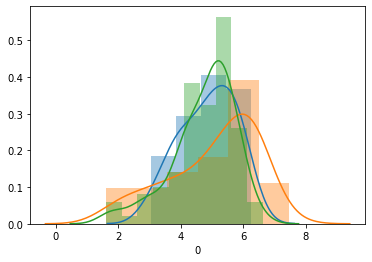

In [34]:
sns.distplot(np.log(all_guides[(all_guides.guide_identity == 'ZNF791_GTCAACACAATTGTCCACGG')&(all_guides[0] >= 5)][0]))
sns.distplot(np.log(all_guides[(all_guides.guide_identity == 'ZNF786_GGAGGCGCTGTAGGACTGAG')&(all_guides[0] >= 5)][0]))
sns.distplot(np.log(all_guides[(all_guides.guide_identity == 'POU3F2_GATACCGCTAGCAACCTCCC')&(all_guides[0] >= 5)][0]))

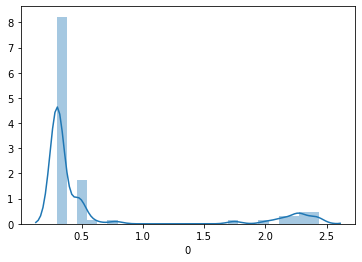

In [35]:
sns.distplot(np.log10(all_guides[(all_guides.guide_identity == 'NKX2-4_GTCTGTCGTAAACCTGGCGC')&(all_guides[0] >= 1)][0]+1))


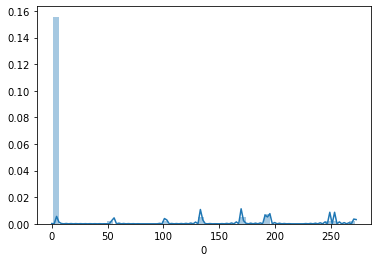

In [36]:
sns.distplot(all_guides[(all_guides.guide_identity == 'NKX2-4_GTCTGTCGTAAACCTGGCGC')&(all_guides[0] >= 1)][0])


In [37]:
guide_umis

cell_barcode         guide_identity                    
AAACCCAAGAAATGGG-1   ARID1B_GCCGGCTGTAGCCCGGATAA            1.0000
                     CDX4_GTGACGCTATGGGGACCAGA              1.0000
                     DRAP1_GCTGCGAGCGGCGTCTTAAC             1.0000
                     KLF4_GGACGTCCACGGGACCTGGA              1.0000
                     NFYC_GGGTCTCGCGAGAATTGGGA            476.0000
                                                            ...   
TTTGTTGTCTTCGCTG-16  FOSB_GGACAGTGCGGGACTCGATT              1.0000
                     NFIC_GGGCACTAGACCAGGACCCC              1.0000
                     RNF138_GGGAGCGCCGGGGATCTGGG            1.0000
                     non_targeting_GGCCGGAGCCGTTCGCTAGC    25.0000
                     non_targeting_GATGCTCGCAGTTCGACCGC     1.0000
Length: 4799297, dtype: float32

# Export guide calls
for each sample import cell calls list

In [38]:
output_path = '/data/norman/datasets/RA022_Hs27aTFs/cellranger_outputs_additionalseq/combined_guide_calls/'

guide_umis.to_hdf(output_path+'aggr_total_guide_umis.h5', key='guide_umis', mode='w')

guide_umis[guide_umis > 5].to_hdf(output_path+'aggr_thres5_guide_umis.h5', key='guide_umis', mode='w')

In [39]:
guide_umis[guide_umis > 5]

cell_barcode         guide_identity                    
AAACCCAAGAAATGGG-1   NFYC_GGGTCTCGCGAGAATTGGGA            476.0000
AAACCCAAGGACTGGT-1   non_targeting_GGGACTCCCTCGGCGGTTAT   781.0000
                     non_targeting_GCTGTTTCGACCCGTCGAAT   478.0000
                     non_targeting_GCAAAGACCACGTCATCGGT    86.0000
AAACCCAAGTCCGTCG-1   RFX8_GGATATGGGGACTCACGTTG            992.0000
                                                            ...   
TTTGTTGTCTCCAAGA-16  PAX3_GCCTCGGCACCACCAGAGAT            270.0000
TTTGTTGTCTCCCTAG-16  ZNF48_GCGCGTCGGCGGTAGCTCTG           125.0000
TTTGTTGTCTCGCTCA-16  THAP1_GTTCCTGGGAAGCTAACTAT           199.0000
                     ZSCAN21_GCCCCCGCGGAAAAGTAGTG         572.0000
TTTGTTGTCTTCGCTG-16  non_targeting_GGCCGGAGCCGTTCGCTAGC    25.0000
Length: 1162489, dtype: float32

# Export GEX

In [40]:
adata_gex

View of AnnData object with n_obs × n_vars = 517319 × 36601
    obs: 'dataset'
    var: 'gene_ids', 'feature_types', 'genome'

In [41]:
#export raw gex aggr, no metadata formating

#adata_raw = adata[:,adata.var['feature_types'].isin(['Gene Expression'])]

#adata_raw.write_h5ad(output_path+'raw_scanpy_aggr.h5ad')

In [42]:
adata_gex.var

,gene_ids,feature_types,genome
MIR1302-2HG,ENSG00000243485,Gene Expression,GRCh38
FAM138A,ENSG00000237613,Gene Expression,GRCh38
OR4F5,ENSG00000186092,Gene Expression,GRCh38
AL627309.1,ENSG00000238009,Gene Expression,GRCh38
AL627309.3,ENSG00000239945,Gene Expression,GRCh38
...,...,...,...
AC141272.1,ENSG00000277836,Gene Expression,GRCh38
AC023491.2,ENSG00000278633,Gene Expression,GRCh38
AC007325.1,ENSG00000276017,Gene Expression,GRCh38
AC007325.4,ENSG00000278817,Gene Expression,GRCh38


In [43]:
filtered_guide_umis = guide_umis[guide_umis > 5]

In [44]:
filtered_guide_umis = filtered_guide_umis.reset_index().rename(columns = {0:'guide_umi_count'})
filtered_guide_umis['guide_umi_count'] = filtered_guide_umis['guide_umi_count'].astype('int')

In [45]:
cell_identities = filtered_guide_umis.sort_values('guide_umi_count', ascending = False).groupby('cell_barcode').first()
cell_identities['guide_umi_count'] = cell_identities['guide_umi_count'].astype('int')

cell_identities

,guide_identity,guide_umi_count
cell_barcode,,
AAACCCAAGAAAGTCT-4,CDCA7L_GGAACGTGATCGGAGCCACG,856
AAACCCAAGAAATGGG-1,NFYC_GGGTCTCGCGAGAATTGGGA,476
AAACCCAAGAAGCGGG-2,ATF7_GAGAAGTCATGGGTCCGCGG,58
AAACCCAAGAATAACC-10,YWHAE_GGGCCCCCGGGGAACGAGAA,611
AAACCCAAGACAGCTG-2,non_targeting_GGAATCCAGCTCGACGACCA,1198
...,...,...
TTTGTTGTCTTGCAAG-5,FOXO3_GCCCAGCCGCAGGTCCCTCC,69
TTTGTTGTCTTGGTCC-10,STAT6_GGTGTTCCCCCACTCGGCAC,153
TTTGTTGTCTTTCTAG-1,ZBTB46_GGGGCGGGGTCAGGGTCCGC,61


In [46]:
filtered_guide_umis

,cell_barcode,guide_identity,guide_umi_count
0,AAACCCAAGAAATGGG-1,NFYC_GGGTCTCGCGAGAATTGGGA,476
1,AAACCCAAGGACTGGT-1,non_targeting_GGGACTCCCTCGGCGGTTAT,781
2,AAACCCAAGGACTGGT-1,non_targeting_GCTGTTTCGACCCGTCGAAT,478
3,AAACCCAAGGACTGGT-1,non_targeting_GCAAAGACCACGTCATCGGT,86
4,AAACCCAAGTCCGTCG-1,RFX8_GGATATGGGGACTCACGTTG,992
...,...,...,...
1162484,TTTGTTGTCTCCAAGA-16,PAX3_GCCTCGGCACCACCAGAGAT,270
1162485,TTTGTTGTCTCCCTAG-16,ZNF48_GCGCGTCGGCGGTAGCTCTG,125
1162486,TTTGTTGTCTCGCTCA-16,THAP1_GTTCCTGGGAAGCTAACTAT,199
1162487,TTTGTTGTCTCGCTCA-16,ZSCAN21_GCCCCCGCGGAAAAGTAGTG,572


In [47]:
all_guides = filtered_guide_umis.groupby('cell_barcode').guide_identity.apply(lambda x: '|'.join(x))
all_guide_umi = filtered_guide_umis.groupby('cell_barcode').guide_umi_count.apply(lambda x: '|'.join(x.astype(str)))

num_cells = filtered_guide_umis.groupby('cell_barcode').guide_identity.count()

In [48]:
cell_identities['thresholded_features'] = all_guides
cell_identities['thresholded_guide_umi'] = all_guide_umi

cell_identities['num_cells'] = num_cells

In [49]:
cell_identities

,guide_identity,guide_umi_count,thresholded_features,thresholded_guide_umi,num_cells
cell_barcode,,,,,
AAACCCAAGAAAGTCT-4,CDCA7L_GGAACGTGATCGGAGCCACG,856,CDCA7L_GGAACGTGATCGGAGCCACG,856,1
AAACCCAAGAAATGGG-1,NFYC_GGGTCTCGCGAGAATTGGGA,476,NFYC_GGGTCTCGCGAGAATTGGGA,476,1
AAACCCAAGAAGCGGG-2,ATF7_GAGAAGTCATGGGTCCGCGG,58,ATF7_GAGAAGTCATGGGTCCGCGG,58,1
AAACCCAAGAATAACC-10,YWHAE_GGGCCCCCGGGGAACGAGAA,611,YWHAE_GGGCCCCCGGGGAACGAGAA|ZFP14_GGGGAAATGTAGT...,611|45,2
AAACCCAAGACAGCTG-2,non_targeting_GGAATCCAGCTCGACGACCA,1198,CLOCK_GGAGCCGCGCCAGGGGATCC|ETS2_GAGGAGGGACGGCC...,6|14|905|1198,4
...,...,...,...,...,...
TTTGTTGTCTTGCAAG-5,FOXO3_GCCCAGCCGCAGGTCCCTCC,69,FOXO3_GCCCAGCCGCAGGTCCCTCC,69,1
TTTGTTGTCTTGGTCC-10,STAT6_GGTGTTCCCCCACTCGGCAC,153,STAT6_GGTGTTCCCCCACTCGGCAC,153,1
TTTGTTGTCTTTCTAG-1,ZBTB46_GGGGCGGGGTCAGGGTCCGC,61,ZBTB46_GGGGCGGGGTCAGGGTCCGC,61,1


In [50]:
adata_gex.var = adata_gex.var.rename(columns={'gene_ids': 'gene_id'}).reset_index().set_index('gene_id').rename(columns={'index': 'gene_name'})

adata_gex.obs['UMI_count'] = adata_gex.X.sum(axis=1)

adata_gex.obs = pd.merge(adata_gex.obs, cell_identities, left_index=True, right_index=True, how='left')

adata_gex = adata_gex[~adata_gex.obs['thresholded_features'].isnull()].copy()

In [51]:
adata_gex.obs

,dataset,UMI_count,guide_identity,guide_umi_count,thresholded_features,thresholded_guide_umi,num_cells
AAACCCAAGAAATGGG-1,aggr_ALL,1058.0000,NFYC_GGGTCTCGCGAGAATTGGGA,476.0000,NFYC_GGGTCTCGCGAGAATTGGGA,476,1.0000
AAACCCAAGGACTGGT-1,aggr_ALL,5482.0000,non_targeting_GGGACTCCCTCGGCGGTTAT,781.0000,non_targeting_GGGACTCCCTCGGCGGTTAT|non_targeti...,781|478|86,3.0000
AAACCCAAGTCCGTCG-1,aggr_ALL,13107.0000,RFX8_GGATATGGGGACTCACGTTG,992.0000,RFX8_GGATATGGGGACTCACGTTG|ZNF25_GGAGCTGCACCCTG...,992|230,2.0000
AAACCCACAACTACGT-1,aggr_ALL,8816.0000,MYB_GCCGAATGGGAGCGGCGACC,1044.0000,MYB_GCCGAATGGGAGCGGCGACC,1044,1.0000
AAACCCACACGAAGAC-1,aggr_ALL,12450.0000,ZNF772_GGGAAGTCCCGCCCTGACGT,2506.0000,MTF1_GCTGAGCTGCAGCCTCCAAT|ZNF772_GGGAAGTCCCGCC...,509|2506,2.0000
...,...,...,...,...,...,...,...
TTTGTTGTCTATACGG-16,aggr_ALL,3548.0000,ZNF616_GAGGGGCGGGTCGGAAAGAG,66.0000,ZNF616_GAGGGGCGGGTCGGAAAGAG,66,1.0000
TTTGTTGTCTCCAAGA-16,aggr_ALL,12273.0000,PAX3_GCCTCGGCACCACCAGAGAT,270.0000,GMEB2_GGCAGGCAACGCCCGACCGG|PAX3_GCCTCGGCACCACC...,256|270,2.0000
TTTGTTGTCTCCCTAG-16,aggr_ALL,4461.0000,ZNF48_GCGCGTCGGCGGTAGCTCTG,125.0000,ZNF48_GCGCGTCGGCGGTAGCTCTG,125,1.0000
TTTGTTGTCTCGCTCA-16,aggr_ALL,12733.0000,ZSCAN21_GCCCCCGCGGAAAAGTAGTG,572.0000,THAP1_GTTCCTGGGAAGCTAACTAT|ZSCAN21_GCCCCCGCGGA...,199|572,2.0000


In [52]:
adata_gex.var['mean'] = pd.Series(adata_gex.X.mean(axis=0).A.flatten(), index=adata_gex.var.index)
adata_gex = adata_gex[:, adata_gex.var['mean'] >= 0.05].copy()
adata_gex.var['in_matrix'] = True

In [56]:
adata_gex.write_h5ad(output_path+'cellranger_aggr_singlets_and_multiplets_5umi_thresh.h5ad')

In [54]:
adata_gex.obs

,dataset,UMI_count,guide_identity,guide_umi_count,thresholded_features,thresholded_guide_umi,num_cells
AAACCCAAGAAATGGG-1,aggr_ALL,1058.0000,NFYC_GGGTCTCGCGAGAATTGGGA,476.0000,NFYC_GGGTCTCGCGAGAATTGGGA,476,1.0000
AAACCCAAGGACTGGT-1,aggr_ALL,5482.0000,non_targeting_GGGACTCCCTCGGCGGTTAT,781.0000,non_targeting_GGGACTCCCTCGGCGGTTAT|non_targeti...,781|478|86,3.0000
AAACCCAAGTCCGTCG-1,aggr_ALL,13107.0000,RFX8_GGATATGGGGACTCACGTTG,992.0000,RFX8_GGATATGGGGACTCACGTTG|ZNF25_GGAGCTGCACCCTG...,992|230,2.0000
AAACCCACAACTACGT-1,aggr_ALL,8816.0000,MYB_GCCGAATGGGAGCGGCGACC,1044.0000,MYB_GCCGAATGGGAGCGGCGACC,1044,1.0000
AAACCCACACGAAGAC-1,aggr_ALL,12450.0000,ZNF772_GGGAAGTCCCGCCCTGACGT,2506.0000,MTF1_GCTGAGCTGCAGCCTCCAAT|ZNF772_GGGAAGTCCCGCC...,509|2506,2.0000
...,...,...,...,...,...,...,...
TTTGTTGTCTATACGG-16,aggr_ALL,3548.0000,ZNF616_GAGGGGCGGGTCGGAAAGAG,66.0000,ZNF616_GAGGGGCGGGTCGGAAAGAG,66,1.0000
TTTGTTGTCTCCAAGA-16,aggr_ALL,12273.0000,PAX3_GCCTCGGCACCACCAGAGAT,270.0000,GMEB2_GGCAGGCAACGCCCGACCGG|PAX3_GCCTCGGCACCACC...,256|270,2.0000
TTTGTTGTCTCCCTAG-16,aggr_ALL,4461.0000,ZNF48_GCGCGTCGGCGGTAGCTCTG,125.0000,ZNF48_GCGCGTCGGCGGTAGCTCTG,125,1.0000
TTTGTTGTCTCGCTCA-16,aggr_ALL,12733.0000,ZSCAN21_GCCCCCGCGGAAAAGTAGTG,572.0000,THAP1_GTTCCTGGGAAGCTAACTAT|ZSCAN21_GCCCCCGCGGA...,199|572,2.0000


In [55]:
adata_gex.var

,gene_name,feature_types,genome,mean,in_matrix
gene_id,,,,,
ENSG00000228794,LINC01128,Gene Expression,GRCh38,0.0561,True
ENSG00000187634,SAMD11,Gene Expression,GRCh38,0.1663,True
ENSG00000188976,NOC2L,Gene Expression,GRCh38,0.3293,True
ENSG00000188290,HES4,Gene Expression,GRCh38,0.6504,True
ENSG00000187608,ISG15,Gene Expression,GRCh38,1.6440,True
...,...,...,...,...,...
ENSG00000198786,MT-ND5,Gene Expression,GRCh38,1.2073,True
ENSG00000198695,MT-ND6,Gene Expression,GRCh38,0.1364,True
ENSG00000198727,MT-CYB,Gene Expression,GRCh38,8.4756,True
